# Тематическое моделирование

**Тематическая модель** (англ. topic model) — модель коллекции текстовых документов, которая определяет, к каким темам относится каждый документ и какие слова (термины) образуют каждую тему.

**Тематическое моделирование** — способ построения такой модели.

### Зачем это нужно?

* для разрешения проблемы синонимии и полисемии терминов
* для тематический поиска, суммаризации и аннотации коллекций документов
* для анализа трендов (изменение тем в наборах документов, новостных потоках)

### Построение тематической модели документа 

* $p(w|t)$ — матрица искомых условных распределений слов по темам 
* $p(t|d)$— матрица искомых условных распределений тем по документам
* $d$ — документ
* $w$ — слово
* $d, w$ — наблюдаемые переменные 
* $t$ — тема (скрытая переменная)

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/%D0%A2%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C.png/1280px-%D0%A2%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C.png' width=600 align='left'>


## Тематические модели

1. **LDA** *(Latent Dirichlet Allocation)* — латентное размещение Дирихле. Самая распространенная модель, разработана в 2002-2003 гг. (David Blei, Andrew Ng, Michael I. Jordan)
2. **LSA** *(latent semantic analysis)*, она же **LSI** *(latent semantic indexing)* — самая ранняя, предложена еще в конце 80-х гг. 
3. **pLSA** *(probabilistic latent semantic analysis)*, она же **pLSI** *(probabilistic latent semantic indexing)* — вероятностный латентно-семантический анализ (индексирование). Предложена в 1999 г. (Thomas Hofmann)

In [4]:
import numpy as np
import pandas as pd

from sklearn.metrics import *
from sklearn.pipeline import *
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import *
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import Normalizer, LabelEncoder

from sklearn.datasets import fetch_20newsgroups

In [42]:
import warnings
warnings.filterwarnings('ignore')

## Данные

In [32]:
import os
import re
from tqdm import tqdm

polkrug = []

for root, dirs, files in tqdm(os.walk('./data/polkrug')):
    for file in files:
        with open(os.path.join(root,file), 'r', encoding='utf-8') as f:
            text = f.read()
            text = re.sub('@.*?(\r)?\n', '', text)
            polkrug.append(text)
            
len(polkrug)

41it [00:00, 48.31it/s]


4288

In [33]:
with open('./data/polkrug.txt', 'w', encoding='utf-8') as f:
    for line in polkrug:
        f.write('%s\n' % line)

In [106]:
from nltk.corpus import stopwords
my_stops = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','г', 'с', 'р', 'руб', 'ул', 'весь', 'свой', 'быть', 'изо', 'это', 'ваш', 'их', 'его', 'ее', 'мой', 'твой', 'потом', 'затем', 'сейчас', 'сегодня', 'вчера', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д', 'п', 'др', 'который','сей', 'мочь', 'такой']
sw = stopwords.words('russian') + my_stops

In [107]:
with open('./data/polkrug_lem.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    
text = re.sub('\{|\}|\xa0', '', text)
texts = text.split('\n\n')

punct = '[!"#$%&()*+,./:;<=>?@[\]^_`{|}~„“«»†*—/\-‘’–]'

texts = [re.sub('\n', ' ', text) for text in texts]
texts = [re.sub(punct, '', text) for text in texts]

tokenized_texts = []
for text in texts:
    text = [w for w in text.split() if w not in sw and w != '–']
    tokenized_texts.append(text)
    
tokenized_texts[:2]

[['лев',
  'толстой',
  'анна',
  'каренина',
  'писать',
  'счастливый',
  'семья',
  'похожий',
  'друг',
  'друг',
  'видимо',
  'зеркало',
  'русский',
  'революция',
  'ошибаться',
  'каждый',
  'семья',
  'счастливый',
  'индивидуально',
  'рецепт',
  'счастливый',
  'чета',
  'ниязов',
  'равиль',
  'майрам',
  'отмечать',
  'пятьдесят',
  'год',
  'совместный',
  'жизнь',
  'полвека',
  'вместе',
  'день',
  'день',
  'год',
  'год',
  'мало',
  'целое',
  'жизнь',
  'человеческий',
  'начало',
  'шестидесятый',
  'юный',
  'энергичный',
  'студент',
  'педучилище',
  'равиль',
  'ниязов',
  'начинать',
  'ухаживать',
  'предлагать',
  'рука',
  'сердце',
  'скромный',
  'девушка',
  'майрам',
  'получать',
  'согласие',
  'брак',
  'молодожены',
  'зарегистрировать',
  'салехардский',
  'загс',
  '10',
  'август',
  '1964',
  'год',
  'благословлять',
  'родные',
  'свадьба',
  'добрый',
  'путь',
  'многий',
  'год',
  'сбываться',
  'напутствие',
  'глава',
  'семья',
  'ока

In [46]:
from gensim.models import *
from gensim import corpora
from gensim import similarities

In [108]:
# почему бы не doc2vec?

print('Making dictionary...')
dictionary = corpora.Dictionary(tokenized_texts)
print('Original: {}'.format(dictionary))
dictionary.filter_extremes(no_below = 5, no_above = 0.5, keep_n=None)
dictionary.save('./data/polkrug.dict')
print('Filtered: {}'.format(dictionary))

print('Vectorizing corpus...')
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]
corpora.MmCorpus.serialize('./data/polkrug.model', corpus) 

Making dictionary...
Original: Dictionary(43129 unique tokens: ['10', '1964', 'август', 'адрес', 'анна']...)
Filtered: Dictionary(12910 unique tokens: ['10', '1964', 'август', 'адрес', 'анна']...)
Vectorizing corpus...


## LDA

In [109]:
print("Training model...")

%time lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=10, chunksize=50, update_every=1, passes=2)

Training model...
Wall time: 12.4 s


In [110]:
lda.show_topics(num_topics=10, num_words=10, formatted=False)

[(0,
  [('обдорск', 0.017075527),
   ('россия', 0.010390827),
   ('русский', 0.009803927),
   ('север', 0.009233787),
   ('северный', 0.009107716),
   ('обдорский', 0.008872288),
   ('ямал', 0.008190822),
   ('век', 0.007984301),
   ('сибирь', 0.007686774),
   ('первый', 0.0069638207)]),
 (1,
  [('город', 0.024674522),
   ('работа', 0.014919308),
   ('дом', 0.014059565),
   ('улица', 0.012653182),
   ('администрация', 0.0119275),
   ('городской', 0.008709995),
   ('объект', 0.0073544625),
   ('глава', 0.0071662106),
   ('ремонт', 0.0068435455),
   ('территория', 0.0064232065)]),
 (2,
  [('война', 0.033097122),
   ('великий', 0.016360363),
   ('победа', 0.015651422),
   ('фронт', 0.012625022),
   ('ветеран', 0.011776267),
   ('отечественный', 0.010925421),
   ('день', 0.010496784),
   ('советский', 0.010317719),
   ('ссыльный', 0.009160804),
   ('военный', 0.008516361)]),
 (3,
  [('округ', 0.015366537),
   ('россия', 0.011630759),
   ('комиссия', 0.011357629),
   ('проект', 0.009983859)

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

In [116]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

%time vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

## LSI (LSA)

In [117]:
lsi = lsimodel.LsiModel(corpus, id2word=dictionary, num_topics=10, chunksize=50)

In [118]:
lsi.show_topics(num_topics=10, num_words=10, formatted=False)

[(0,
  [('город', 0.2579400775382587),
   ('работа', 0.18949793294889564),
   ('день', 0.1632914207682967),
   ('человек', 0.1575413242606581),
   ('россия', 0.13525997653158134),
   ('ребенок', 0.13302269052418117),
   ('городской', 0.12033753398665645),
   ('округ', 0.11463754189996872),
   ('администрация', 0.10946325305601659),
   ('ямал', 0.1091905825767168)]),
 (1,
  [('война', -0.20326348862218707),
   ('сторона', 0.14342099303917016),
   ('победа', -0.13729998699765486),
   ('полиция', 0.1338708091787259),
   ('ребенок', -0.132669781248382),
   ('день', -0.1316490344852672),
   ('город', 0.11997802747761285),
   ('великий', -0.11516183208363166),
   ('май', -0.11429495290659526),
   ('июнь', -0.1137694456226799)]),
 (2,
  [('война', -0.20211852631589236),
   ('победа', -0.1680984531182584),
   ('социальный', -0.15706599579058173),
   ('россия', 0.15478124054428863),
   ('июнь', 0.12912051095087584),
   ('май', -0.12694904807846139),
   ('библиотека', 0.12400623857293669),
   ('

## t-SNE

### Способ №1

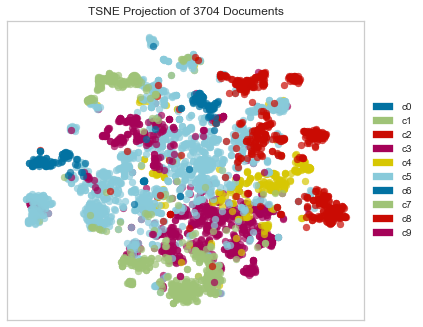

In [131]:
import yellowbrick
from yellowbrick.text import TSNEVisualizer
from sklearn.manifold import TSNE
from sklearn.cluster import *
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import *

data = [' '.join(text) for text in tokenized_texts]
vect = TfidfVectorizer(max_df=0.8, min_df=5, ngram_range=(1,3), analyzer='word', stop_words = sw)
X = vect.fit_transform(data)
X.shape

# чтобы было, по каким атрибутам раскрашивать
clf = KMeans(n_clusters=10)
clf.fit_transform(X)
colors = ["c{}".format(c) for c in clf.labels_]

tsne = TSNEVisualizer()
tsne.fit(X, colors)
tsne.poof()

### Способ №2

In [132]:
X_reduced = TruncatedSVD(n_components=5, random_state=0).fit_transform(X)
X_embedded = TSNE(n_components=2, perplexity=5, verbose=0).fit_transform(X_reduced)

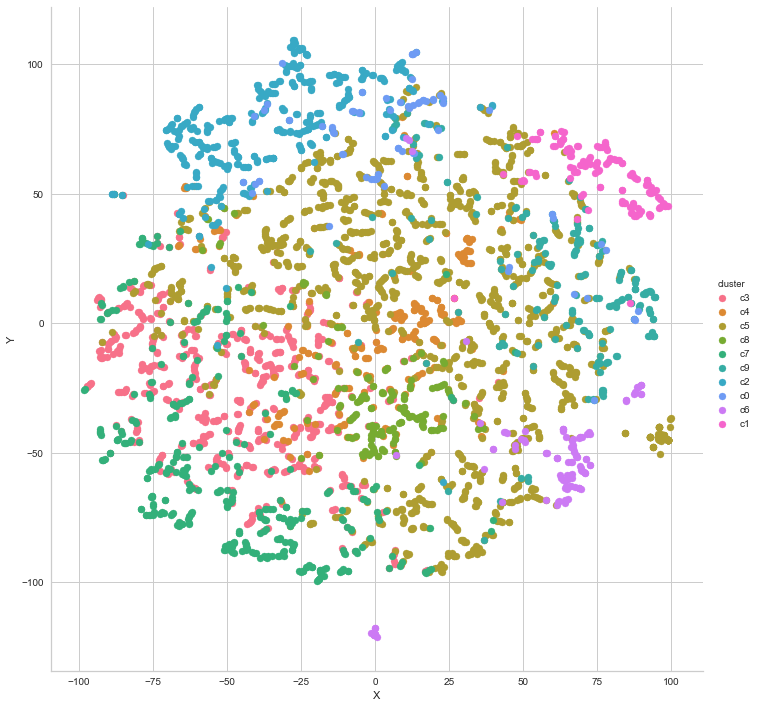

In [135]:
vis_df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'cluster': colors})
sns.FacetGrid(vis_df, hue='cluster', height=10).map(plt.scatter, "X", "Y").add_legend()